# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. 

## Откройте и изучите файл

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from joblib import dump
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier

In [3]:
df = pd.read_csv('/datasets/users_behavior.csv')

df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


Согласно документации к данным:

* `calls` — количество звонков;
* `minutes` — суммарная длительность звонков в минутах;  
* `messages` — количество sms-сообщений;
* `mb_used` — израсходованный интернет-трафик в Мб;
* `is_ultra` — каким тарифом пользовался в течение месяца ("Ультра" - 1 "Смарт" - 0).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Из описания данных, видно что пропущенных значений нет и значения соответсвуют типам данных таблицы. Данные можно использовать в проекте.

Проверим распредление классов в столбце is_ultra.

In [5]:
print(df['is_ultra'].value_counts())

0    2229
1     985
Name: is_ultra, dtype: int64


In [6]:
print(((985) / (2229 + 985)) * 100)

print((df['is_ultra'] == 1).sum() / ((df['is_ultra'] == 1).sum() + (df['is_ultra'] == 0).sum()) * 100)

30.647168637212197
30.647168637212197


## Разбейте данные на выборки

In [7]:
features = df.drop(['is_ultra'], axis = 1)
target = df['is_ultra']

In [8]:
features_train, features_prom, target_train, target_prom = \
train_test_split(features, target, test_size = 0.4, random_state = 12345, stratify = target)
 
features_valid, features_test, target_valid, target_test = \
train_test_split(features_prom, target_prom, test_size = 0.5, random_state=12345, stratify = target_prom)

print('Проверим кол-во элементов в выборкаx:')
print('features_train', features_train.shape)
print('target_train  ', target_train.shape)
print('features_valid', features_valid.shape)
print('target_valid  ', target_valid.shape)
print('features_test ', features_test.shape)
print('target_test   ', target_test.shape)
print('')

print('Проверим на сбалансированность таргетов в выборках:')
print('target_train:')
print(target_train.value_counts())
print('')
print('target_test')
print(target_test.value_counts())

Проверим кол-во элементов в выборкаx:
features_train (1928, 4)
target_train   (1928,)
features_valid (643, 4)
target_valid   (643,)
features_test  (643, 4)
target_test    (643,)

Проверим на сбалансированность таргетов в выборках:
target_train:
0    1337
1     591
Name: is_ultra, dtype: int64

target_test
0    446
1    197
Name: is_ultra, dtype: int64


## Исследуйте модели

Дерево решений.

Лучшие показатели модели:
depth = 3
accuracy = 0.7776049766718507


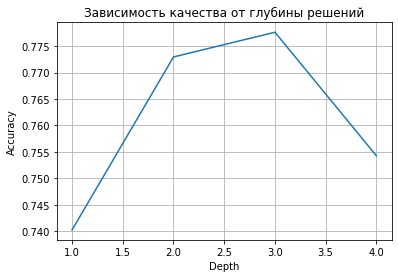

In [9]:
best_model = None
best_result = 0
best_depth = 0

x = []
y = []

for depth in range(1,5):
    model_one = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    model_one.fit(features_train, target_train)
    predictions = model_one.predict(features_valid)
    result = accuracy_score(target_valid, predictions)
    x.append(depth)
    y.append(result)
    if result > best_result:
        best_model = model_one
        best_result = result
        best_depth = depth

print('Лучшие показатели модели:')
print('depth =', best_depth)
print('accuracy =', best_result)

plt.plot(x, y)
plt.title('Зависимость качества от глубины решений')
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

Случайный лес.

Лучшие показатели модели:
n_estimators = 4
accuracy = 0.7558320373250389


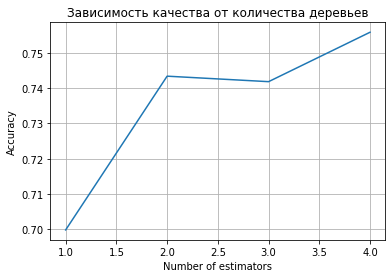

In [10]:
best_model_two = None
best_result_two = 0
best_est = 0

x_two = []
y_two = []

for est in range(1,5):
    model_two = RandomForestClassifier(random_state = 12345, n_estimators = est)
    model_two.fit(features_train, target_train)
    predictions_two = model_two.predict(features_valid)
    result_two = accuracy_score(target_valid, predictions_two)
    x_two.append(est)
    y_two.append(result_two)
    if result_two > best_result_two:
        best_model_two = model_two
        best_result = result_two
        best_est = est

print('Лучшие показатели модели:')
print('n_estimators =', best_est)
print('accuracy =', best_result)

plt.plot(x_two, y_two)
plt.title('Зависимость качества от количества деревьев')
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

Логистическая регрессия.

Лучшие показатели модели:
max_iter = 100
accuracy = 0.7387247278382582


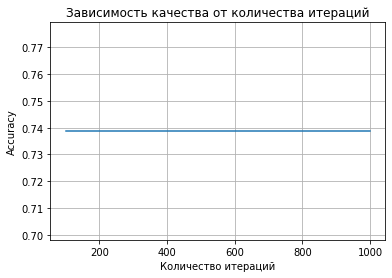

In [11]:
best_model_three = None
best_result_three = 0
best_iter = 0

x_three = []
y_three = []

for i in range(100, 1100, 100):
    model_three = LogisticRegression(random_state = 12345, solver = 'lbfgs', max_iter = i)
    model_three.fit(features_train, target_train)
    dump(model_three, 'model_9_1.joblib')
    predictions_three = model_three.predict(features_valid)
    result_three = accuracy_score(target_valid, predictions_three)
    x_three.append(i)
    y_three.append(result_three)
    if result_three > best_result_three:
        best_model_three = model_three
        best_result_three = result_three
        best_iter = i

print('Лучшие показатели модели:')
print('max_iter =', best_iter)
print('accuracy =', best_result_three)

plt.plot(x_three, y_three)
plt.title('Зависимость качества от количества итераций')
plt.xlabel("Количество итераций")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

## Проверьте модель на тестовой выборке

Проверим модель случайного леса на тестовой выборке.
Перед этим соеденим тренировочную и валидационные выборки.

In [12]:
model_four = RandomForestClassifier(random_state = 12345, n_estimators = 4)

model_four.fit(pd.concat([features_train, features_valid]), pd.concat([target_train, target_valid]))

test_predictions = model_four.predict(features_test)

print('Качество модели обученной на выборке (тренировочная и валидационная):')
print(accuracy_score(target_test, test_predictions))

Качество модели обученной на выборке (тренировочная и валидационная):
0.7900466562986003


Вывод: я думаю полученную модель можно использовать для рекомендации клиентам подходящего для них тарифа. Модель может распознать под какой тариф подходят использование клиентом интернета, смс и других ресуросов для подключения к более выгодному.

## (бонус) Проверьте модели на адекватность

В теории написано: для оценки адекватности модели в задачах классификации нужно сравнить её со случайной. Как можно это сделать? В теории очень мало информации про адекватность, интересно в этом разобраться.

In [16]:
#создадим датафрейм равный по кол-ву элементов target_test но полностью из нулей
target_test_copy = target_test.copy(deep=True)

target_test_copy[target_test_copy < 2] = 0

print('Доля правильных ответов по отношение к выборке только из нулей:')
print(accuracy_score(target_test, target_test_copy))

prom = DummyClassifier(strategy= 'most_frequent', random_state=1)

prom.fit(features_train, target_train)

predictions_prom = prom.predict(features_valid)
print(prom.score(features_test, target_test))


Доля правильных ответов по отношение к выборке только из нулей:
0.6936236391912908
0.6936236391912908


# Вывод

Для проведения исследования были предоставлены данные о поведении клиентов, в данных нет пропущеных и некорректных значений. Классы в столбце таргетов не сбалансированны, 0 и 1 распределены 70 на 30 % Разделил данные на выборки для обучения 60 % от исхлдных данных, на валидационную 20 % и тестовую 20%. Далее я обучил три модели на тренировочной выбрке, модель с наибольшим значением качества - случайный лес.